# Task 1

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt  
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, tree 
%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
bioresponse = pd.read_csv('bioresponse.csv')
bioresponse

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


## 1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;


Since small and deep trees behave differently depending on the size of the test and training samples, we will create a simple function in which we will adjust the size of the test set.

In [3]:
def split(test_size=0.3):
    train_x, test_x, train_y, test_y = train_test_split(bioresponse.drop("Activity", axis=1), 
                                                        bioresponse["Activity"], 
                                                        test_size = test_size,
                                                        random_state = 1)
    return train_x, test_x, train_y, test_y

## 2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;


In [4]:
def metrics_out(test_y, predictions):
    print(f"accuracy_score: {metrics.accuracy_score(test_y, predictions):.3f}")
    print(f"precision_score: {metrics.precision_score(test_y, predictions):.3f}")
    print(f"recall_score: {metrics.recall_score(test_y, predictions):.3f}")
    print(f"f1_score: {metrics.f1_score(test_y, predictions):.3f}")
    print(f"log_loss: {metrics.log_loss(test_y, predictions):.3f}")

## 3. Plot precision-recall and ROC curves for your models.

We will output the roc curve and the precision-recall curve for each of the models, as well as the confusion matrix, where we can quantify the false negative errors.

False Negative: Actual = 1 and Predicted = 0

In [5]:
def precision_recall_roc(test_y, predictions, predictions_proba):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(14, 6)
    
    # build precision-recall
    prec, rec, thresh = precision_recall_curve(test_y, predictions_proba)
    ax[0].plot(thresh, prec[:-1], label="Precision")
    ax[0].plot(thresh, rec[:-1], label="Recall")
    ax[0].legend()
    ax[0].set_title("Precision-Recall curve")
    ax[0].set_ylabel("Density")
    ax[0].set_xlabel("Threshold")
    
    # build ROC
    fpr, tpr, thr = roc_curve(test_y, predictions_proba)
    roc_auc = roc_auc_score(predictions, test_y)
    ax[1].plot(fpr, tpr, label=f"ROC\nROC AUC = {roc_auc:.2f}")
    ax[1].legend()
    ax[1].set_title("ROC curve")
    ax[1].set_ylabel("true positive rate")
    ax[1].set_xlabel("false positive rate")
    fig.tight_layout()
    
    # show confusion matrix
    cm = metrics.confusion_matrix(test_y, predictions)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()
    print(f"False Negative: {cm[1][0]}")

### Small decision tree

small tree = tree with depth ± 2

In [6]:
train_x, test_x, train_y, test_y = split(test_size=0.3)

In [7]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [8]:
small_dt_predictions = clf.predict(test_x)
small_dt_predictions_proba = clf.predict_proba(test_x)[:,1]

accuracy_score: 0.760
precision_score: 0.749
recall_score: 0.852
f1_score: 0.797
log_loss: 8.282


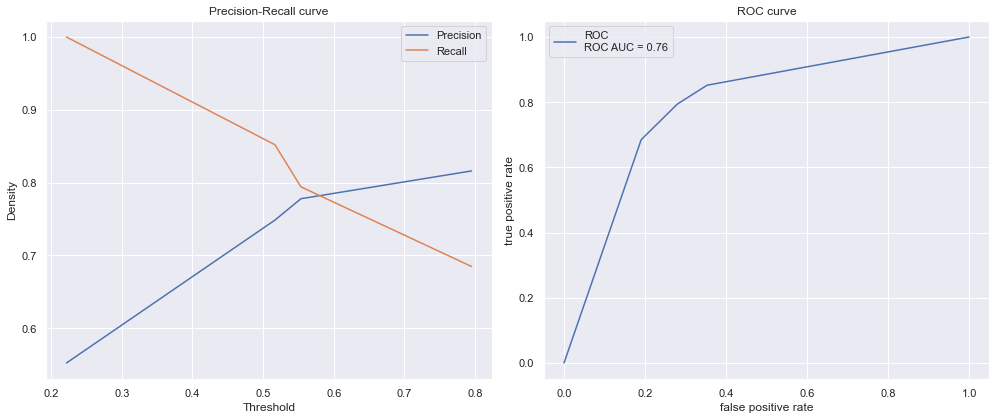

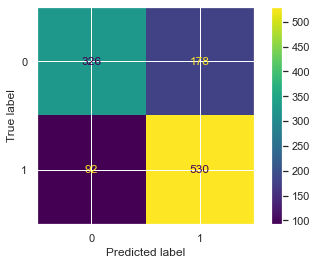

False Negative: 92


In [9]:
metrics_out(test_y, small_dt_predictions)
precision_recall_roc(test_y, small_dt_predictions, small_dt_predictions_proba)

### Deep decision tree

deep three = tree with depth ± 10

In [10]:
train_x, test_x, train_y, test_y = split(test_size=0.3)

In [11]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth=10)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [12]:
deep_dt_predictions = clf.predict(test_x)
deep_dt_predictions_proba = clf.predict_proba(test_x)[:,1]

accuracy_score: 0.748
precision_score: 0.780
recall_score: 0.757
f1_score: 0.768
log_loss: 8.711


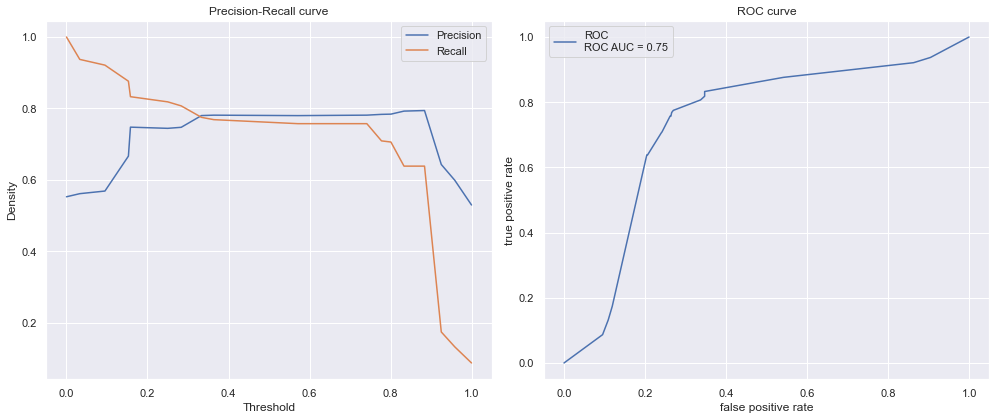

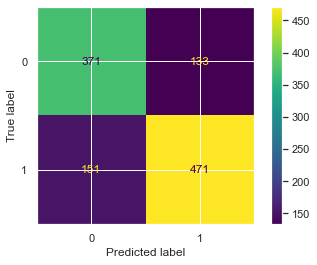

False Negative: 151


In [13]:
metrics_out(test_y, deep_dt_predictions)
precision_recall_roc(test_y, deep_dt_predictions, deep_dt_predictions_proba)

### Random forest on small trees

In [14]:
train_x, test_x, train_y, test_y = split(test_size=0.2)

In [15]:
clf = RandomForestClassifier(n_estimators = 50, max_depth = 1, random_state = 1)
clf.fit(train_x, train_y)

RandomForestClassifier(max_depth=1, n_estimators=50, random_state=1)

In [16]:
rf_classifier_small_trees = clf.predict(test_x)
rf_classifier_small_trees_proba = clf.predict_proba(test_x)[:,1]

accuracy_score: 0.636
precision_score: 0.607
recall_score: 0.944
f1_score: 0.739
log_loss: 12.556


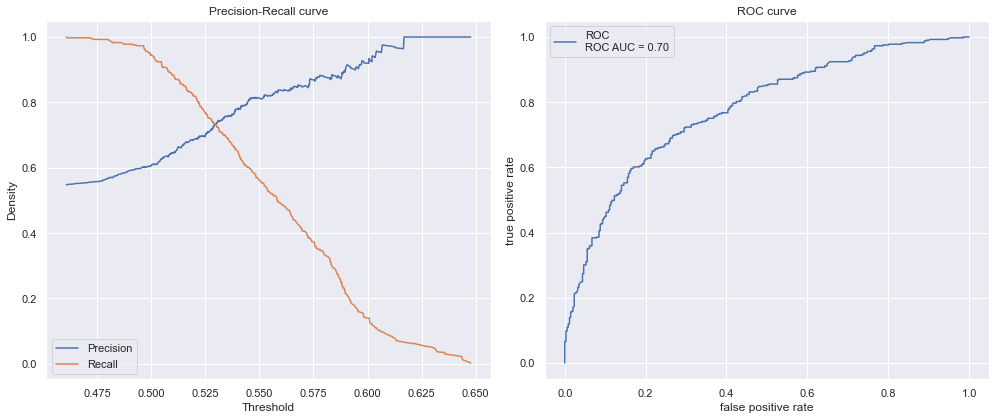

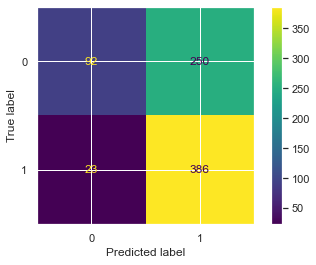

False Negative: 23


In [17]:
metrics_out(test_y, rf_classifier_small_trees)
precision_recall_roc(test_y, rf_classifier_small_trees, rf_classifier_small_trees_proba)

### Random forest on deep trees

In [18]:
train_x, test_x, train_y, test_y = split(test_size=0.3)

In [19]:
clf = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)
clf.fit(train_x, train_y)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [20]:
rf_classifier_deep_trees = clf.predict(test_x) 
rf_classifier_deep_trees_proba = clf.predict_proba(test_x)[:,1]

accuracy_score: 0.775
precision_score: 0.804
recall_score: 0.785
f1_score: 0.794
log_loss: 7.761


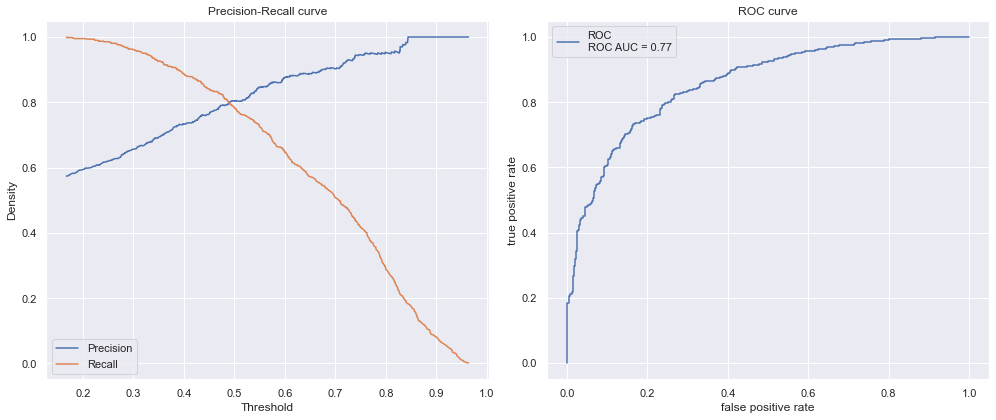

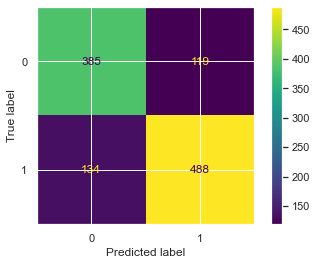

False Negative: 134


In [21]:
metrics_out(test_y, rf_classifier_deep_trees)
precision_recall_roc(test_y, rf_classifier_deep_trees, rf_classifier_deep_trees_proba)

Small decision tree shows the best result when evaluating the measure by parameter f1 measure

## 4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.

$$Recall=\frac{TP}{TP+FN}$$

### DecisionTree

In [22]:
max_recall = 0
best_depth = 0
best_test_size = 0
for depth in [1, 2, 3, 4, 5]:
    for test_size in range(1, 10):
        train_x, test_x, train_y, test_y = split(test_size=test_size/100)
        clf = tree.DecisionTreeClassifier(random_state=1, max_depth=depth)
        clf.fit(train_x, train_y)
        recall = metrics.recall_score(test_y, clf.predict(test_x))
        if recall > max_recall:
            max_recall = recall
            best_depth = depth
            best_test_size = test_size/100
print(f"Max recall = {max_recall:.3f}, test_size = {best_test_size}, depth = {best_depth}")

Max recall = 0.870, test_size = 0.07, depth = 2


### Random forest

In [23]:
max_recall = 0
best_depth = 0
best_test_size = 0
for depth in [1, 2, 3, 4, 5, 6]:
    for test_size in range(10, 25):
        train_x, test_x, train_y, test_y = split(test_size=test_size/100)
        clf = RandomForestClassifier(n_estimators = 50, max_depth = depth, random_state = 1)
        clf.fit(train_x, train_y)
        recall = metrics.recall_score(test_y, clf.predict(test_x))
        if recall > max_recall:
            max_recall = recall
            min_depth = depth
            min_test_size = test_size/100
print(f"Max recall = {max_recall:.3f}, test_size = {min_test_size}, depth = {min_depth}")

Max recall = 0.972, test_size = 0.21, depth = 1


The best recall result was shown by a random forest model with the following parameters:

test_size = 0.21\
depth = 1

accuracy_score: 0.614
precision_score: 0.586
recall_score: 0.972
f1_score: 0.731
log_loss: 13.325


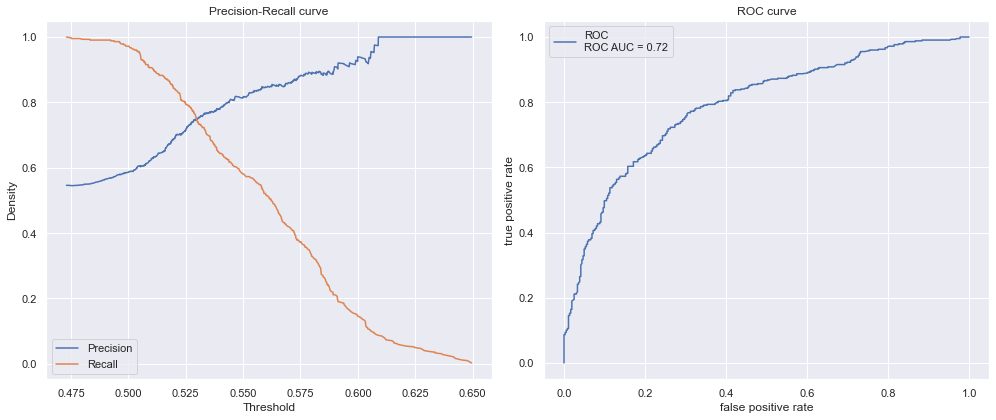

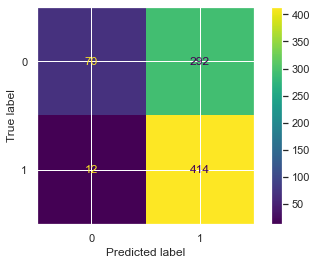

False Negative: 12


In [24]:
train_x, test_x, train_y, test_y = split(test_size=0.21)
clf = RandomForestClassifier(n_estimators = 50, max_depth = 1, random_state = 1)
clf.fit(train_x, train_y)
rf_classifier_deep_trees = clf.predict(test_x) 
rf_classifier_deep_trees_proba = clf.predict_proba(test_x)[:,1]
metrics_out(test_y, rf_classifier_deep_trees)
precision_recall_roc(test_y, rf_classifier_deep_trees, rf_classifier_deep_trees_proba)

To achieve the highest recall, we need another model - small random forest treeSmall decision tree shows the best result when evaluating the measure by parameter f1\
Deep trees on the presented data set perform worse than small trees.